#### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm,boxcox
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
import warnings
warnings.filterwarnings("ignore")

### 1.Data preprocessing

#### Importing the dataset

In [3]:
df=pd.read_csv("churn_modelling.csv")

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df=df.iloc[:,3:]

In [6]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.shape

(10000, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [9]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

* So we dont have any null value

#### How each independent variable affecting the target variable

* Numerical variable
* Categorical variable

In [11]:
plt.style.use("ggplot")

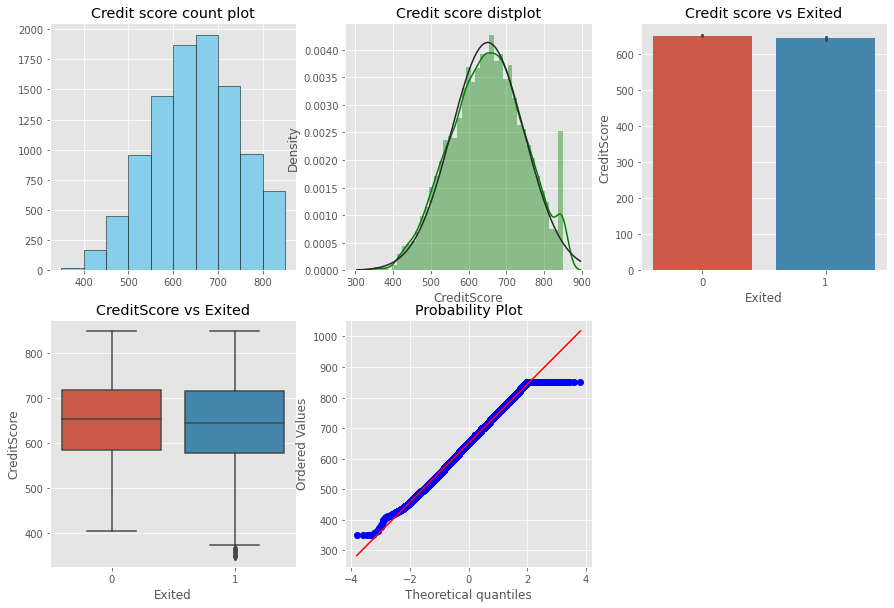

In [12]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.hist(df["CreditScore"],color="skyblue",edgecolor="black")
plt.title("Credit score count plot")
plt.subplot(2,3,2)
sns.distplot(df["CreditScore"],fit=norm,color="green")
plt.title("Credit score distplot")
plt.subplot(2,3,3)
sns.barplot(df["Exited"],df["CreditScore"])
plt.title("Credit score vs Exited")
plt.subplot(2,3,4)
sns.boxplot(df["Exited"],df["CreditScore"])
plt.title("CreditScore vs Exited")
plt.subplot(2,3,5)
stats.probplot(df["CreditScore"],plot=plt)
plt.show()

* 1 From first plot we can see most of the customers have credit score b/w 600 to 700
* 2.From seonnd and fifth plot it seems the data is normal distributed
* 3.From third plot it is difficult to guess any effect of credit score on Exited

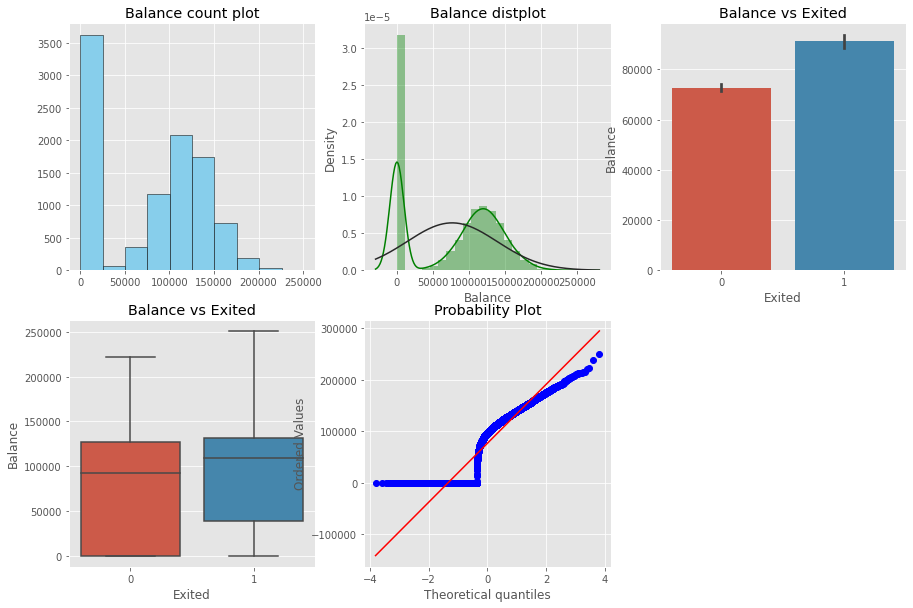

In [13]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.hist(df["Balance"],color="skyblue",edgecolor="black")
plt.title("Balance count plot")
plt.subplot(2,3,2)
sns.distplot(df["Balance"],fit=norm,color="green")
plt.title("Balance distplot")
plt.subplot(2,3,3)
sns.barplot(df["Exited"],df["Balance"])
plt.title("Balance vs Exited")
plt.subplot(2,3,4)
sns.boxplot(df["Exited"],df["Balance"])
plt.title("Balance vs Exited")
plt.subplot(2,3,5)
stats.probplot(df["Balance"],plot=plt)
plt.show()

* 1.From the first plot we can see most of the customers have balance from 0 to 25000
* 2 From the third plot we can see those customers have more than 80000 in balance are more likely to leave

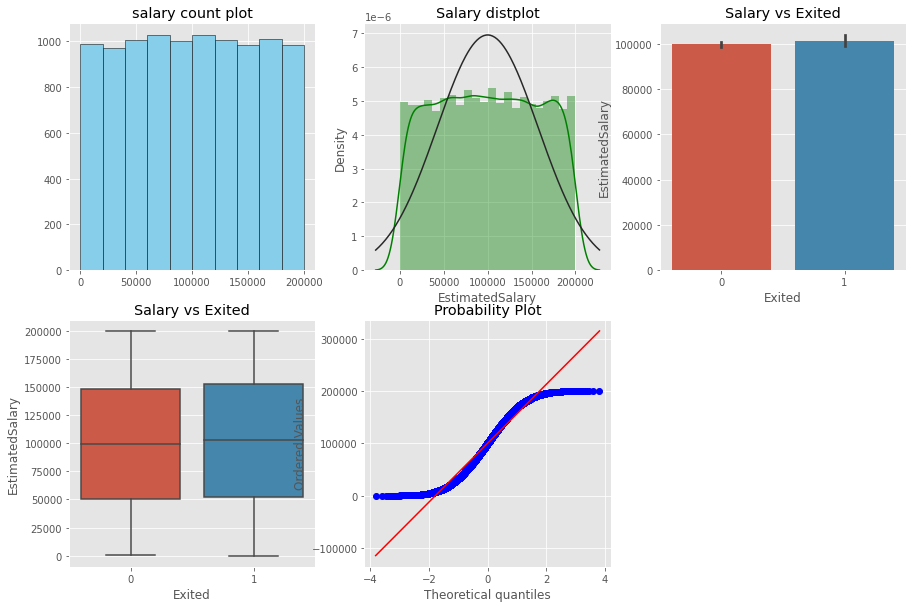

In [14]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.hist(df["EstimatedSalary"],color="skyblue",edgecolor="black")
plt.title("salary count plot")
plt.subplot(2,3,2)
sns.distplot(df["EstimatedSalary"],fit=norm,color="green")
plt.title("Salary distplot")
plt.subplot(2,3,3)
sns.barplot(df["Exited"],df["EstimatedSalary"])
plt.title("Salary vs Exited")
plt.subplot(2,3,4)
sns.boxplot(df["Exited"],df["EstimatedSalary"])
plt.title("Salary vs Exited")
plt.subplot(2,3,5)
stats.probplot(df["EstimatedSalary"],plot=plt)
plt.show()

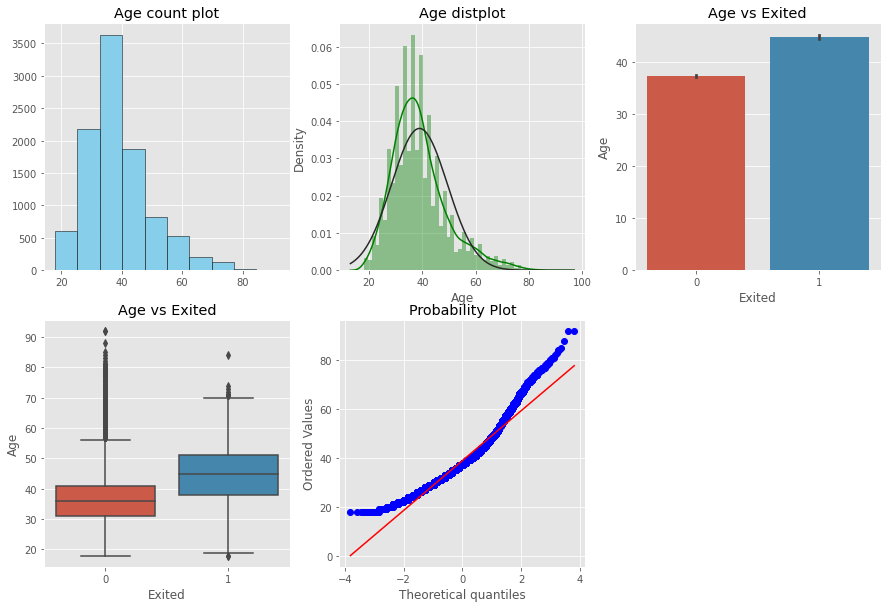

In [15]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.hist(df["Age"],color="skyblue",edgecolor="black")
plt.title("Age count plot")
plt.subplot(2,3,2)
sns.distplot(df["Age"],fit=norm,color="green")
plt.title("Age distplot")
plt.subplot(2,3,3)
sns.barplot(df["Exited"],df["Age"])
plt.title("Age vs Exited")
plt.subplot(2,3,4)
sns.boxplot(df["Exited"],df["Age"])
plt.title("Age vs Exited")
plt.subplot(2,3,5)
stats.probplot(df["Age"],plot=plt)
plt.show()

* 1.From the first plot we can see most of cutomers have age from 20 to 40 years
* 2.From the thrid plot we can see those customers have age more than 40 years are more likely to leave
* 3.From the fourth plot we can also see the median difference 

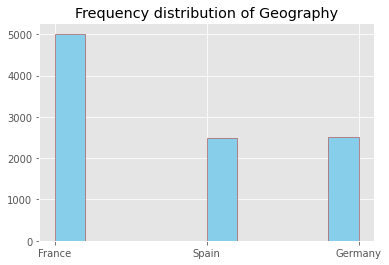

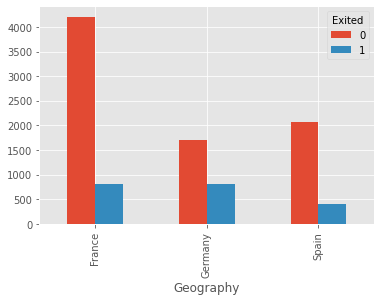

In [16]:
plt.figure(figsize=(6,4))
plt.hist(df["Geography"],color="skyblue",edgecolor="brown")
plt.title ("Frequency distribution of Geography")
pd.crosstab(df["Geography"],df["Exited"]).plot(kind="bar")
plt.show()

* From the first plot we can see in our dataset lot of customers are from France
* From the second plot we can see customers from spain are less likely to leave

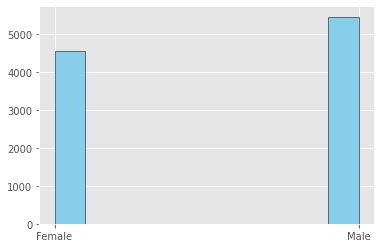

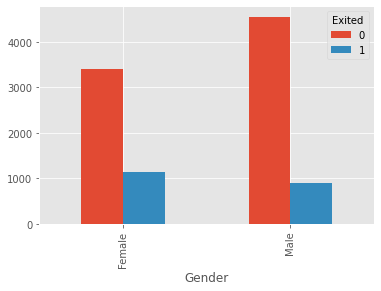

In [17]:
plt.figure(figsize=(6,4))
plt.hist(df["Gender"],color="skyblue",edgecolor="black")
pd.crosstab(df["Gender"],df["Exited"]).plot(kind="bar")
plt.show()

* From the first plot we can see males are more than female
* From the second plot we can see female are more likely to leave

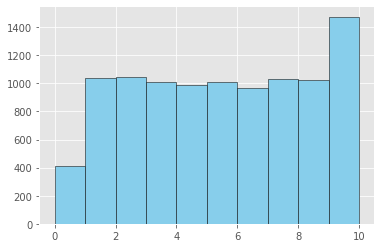

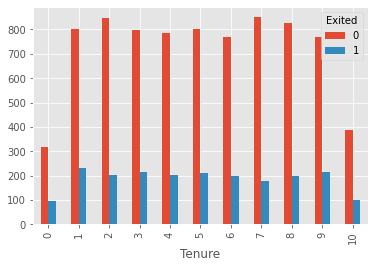

In [18]:
plt.figure(figsize=(6,4))
plt.hist(df["Tenure"],color="skyblue",edgecolor="black")
pd.crosstab(df["Tenure"],df["Exited"]).plot(kind="bar")
plt.show()

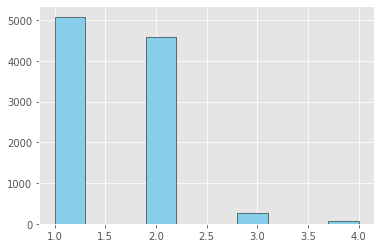

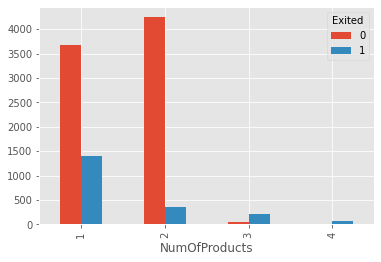

In [19]:
plt.figure(figsize=(6,4))
plt.hist(df["NumOfProducts"],color="skyblue",edgecolor="black")
pd.crosstab(df["NumOfProducts"],df["Exited"]).plot(kind="bar")
plt.show()

* From the first plot we can see most of customers have taken only one product(like personal loan,education loan)
* From the second plot we can see the trend like if the customer have taken more products are less likely to leave the bank

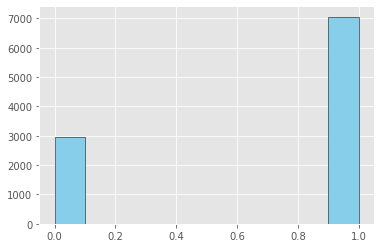

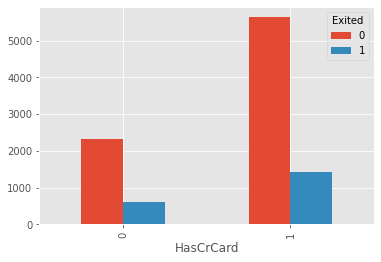

In [20]:
plt.figure(figsize=(6,4))
plt.hist(df["HasCrCard"],color="skyblue",edgecolor="black")
pd.crosstab(df["HasCrCard"],df["Exited"]).plot(kind="bar")
plt.show()

* From the first plot we can see lot of customers have credit card(1 means yes)
* From the second plot we cant comment we need to take in terms of percentage then
we will decide

In [21]:
df[df["HasCrCard"]==0]["Exited"].value_counts(normalize=True)

0    0.791851
1    0.208149
Name: Exited, dtype: float64

In [22]:
df[df["HasCrCard"]==1]["Exited"].value_counts(normalize=True)

0    0.798157
1    0.201843
Name: Exited, dtype: float64

* So there is no any effect on exited 

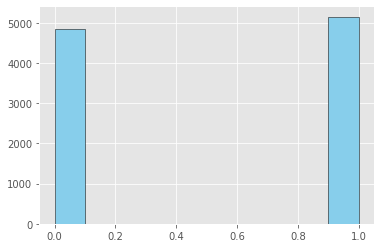

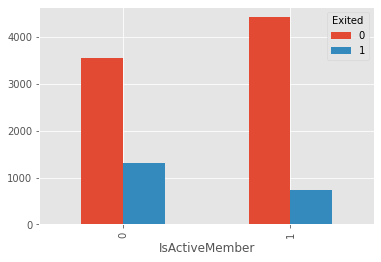

In [23]:
plt.figure(figsize=(6,4))
plt.hist(df["IsActiveMember"],color="skyblue",edgecolor="black")
pd.crosstab(df["IsActiveMember"],df["Exited"]).plot(kind="bar")
plt.show()

* From the first plot we can see slightly more number of customers are activemember
* From the second plto we can see those customers who are activemember are less likely to leave

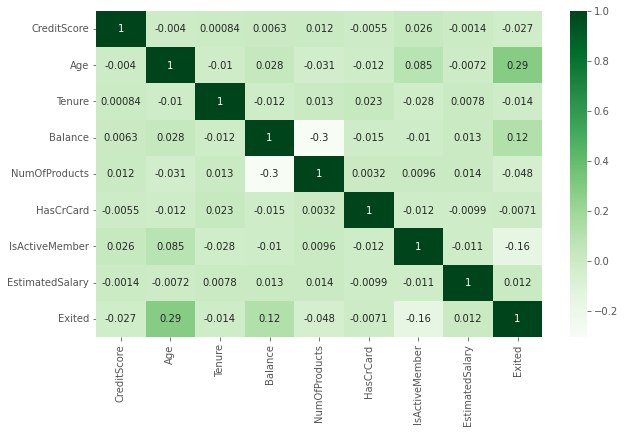

In [24]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap="Greens")
plt.show()

* So there is no multicolinearity in the dataset

#### Analysis of dependent variable

In [25]:
values=df["Exited"].value_counts().values
index=df["Exited"].value_counts().index

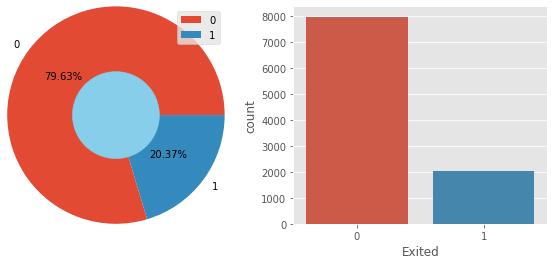

In [26]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.pie(values,labels=index,radius=1.25,autopct="%0.2F%%")
my_circle=plt.Circle( (0,0), 0.5, color='skyblue')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.subplot(1,2,2)
sns.countplot(df["Exited"])
plt.show()

* From the plots we can see we have a imbalanced dataset we need to fix this

#### Checking outliers

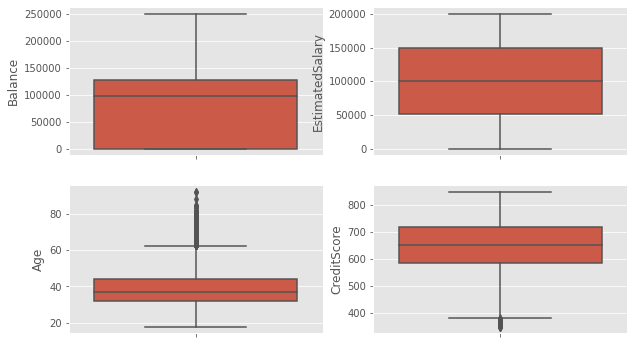

In [27]:
plt.figure(figsize=(10,6))
columns=["Balance","EstimatedSalary","Age","CreditScore"]
for i in range(0,len(columns)):
    plt.subplot(2,2,i+1)
    sns.boxplot(y=df[columns[i]])
plt.show()

* Actually we dont have outliers upper hence is continous to last data point
  means they are not extreme

#### Now we will remove skewness from data  
- Estimated Salary

In [28]:
df["EstimatedSalary"],lam_Estimated_Salary=boxcox(df["EstimatedSalary"])

#### Encoding categorical data
- gender column
- geography column

In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [30]:
le=LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"])
# fit_transform

In [31]:
df["Gender"].value_counts()

1    5457
0    4543
Name: Gender, dtype: int64

#### One hot encoding 

In [32]:
a=pd.get_dummies(df["Geography"])
a=a.drop(a.columns[-1],axis=1)
df=pd.concat([df,a],axis=1)
df.drop("Geography",axis=1,inplace=True)

In [33]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany
0,619,0,42,2,0.00,1,1,1,5151.740581,1,1,0
1,608,0,41,1,83807.86,1,0,1,5550.872423,0,0,0
2,502,0,42,8,159660.80,3,1,0,5599.582848,1,1,0
3,699,0,39,1,0.00,2,0,0,4876.377126,0,1,0
4,850,0,43,2,125510.82,1,1,1,4317.352235,0,0,0


In [34]:
df["IsActiveMember"].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

#### Spliting the dataset into train and test

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X=df.drop("Exited",axis=1)
y=df["Exited"]

#### Balance the class Exited

In [37]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy="minority")
# fit_resample

In [38]:
X,y=smote.fit_resample(X,y)

In [39]:
y.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

In [41]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany
12497,571,0,46,4,99374.256944,1,1,0,8259.892352,0,1
15699,558,0,41,5,143308.866064,1,0,0,8105.293431,0,0
4877,737,1,44,7,0.000000,2,0,0,3457.401464,1,0
5406,516,0,47,6,109387.330000,1,0,0,5857.443762,1,0
2655,850,1,53,2,94078.970000,2,1,0,2512.133652,0,1


In [42]:
X_train.shape

(12740, 11)

In [43]:
y_train.head()

12497    1
15699    1
4877     0
5406     0
2655     0
Name: Exited, dtype: int64

In [44]:
X_test.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany
8508,678,1,27,2,0.000000,2,1,1,1206.946230,0,0
5963,850,0,40,7,104449.800000,1,1,1,154.874141,0,1
14767,750,0,43,1,158135.580527,1,0,0,1228.241621,1,0
6971,554,0,44,9,135814.700000,2,0,0,5640.125298,1,0
5593,617,1,50,7,0.000000,1,1,0,7903.775938,0,0
7260,773,0,41,7,190238.930000,1,1,1,3442.545155,1,0
2423,662,0,29,10,0.000000,2,1,0,6402.307866,1,0
15242,784,0,49,2,172372.885511,2,0,0,1300.950499,0,0
10338,554,0,40,4,0.000000,1,1,0,4554.416032,0,0
2971,681,1,30,2,111093.010000,1,1,0,3917.020047,0,0


In [45]:
X_test.shape

(3186, 11)

#### Feature scalling

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
scaler=MinMaxScaler()
X_train[X_train.columns]=scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns]=scaler.transform(X_test[X_test.columns])

In [48]:
X_train.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany
count,12740.000000,12740.000000,12740.000000,12740.000000,12740.000000,12740.000000,12740.000000,12740.000000,12740.000000,12740.000000,12740.000000
mean,0.598675,0.408634,0.309606,0.479027,0.330235,0.138697,0.623862,0.371507,0.585735,0.389403,0.250628
std,0.184222,0.491601,0.133813,0.272264,0.243180,0.190788,0.484434,0.483227,0.267226,0.487634,0.433392
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.474000,0.000000,0.216216,0.200000,0.000000,0.000000,0.000000,0.000000,0.376795,0.000000,0.000000
50%,0.598000,0.000000,0.297297,0.500000,0.414160,0.000000,1.000000,0.000000,0.613457,0.000000,0.000000
75%,0.726000,1.000000,0.391892,0.700000,0.517456,0.333333,1.000000,1.000000,0.815062,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
X_test.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany
count,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000
mean,0.596553,0.413685,0.311935,0.490898,0.317356,0.150450,0.633396,0.365035,0.584056,0.389831,0.249215
std,0.183284,0.492571,0.136828,0.276770,0.246806,0.194550,0.481953,0.481515,0.262601,0.487788,0.432627
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003713,0.000000,0.000000
25%,0.468000,0.000000,0.216216,0.300000,0.000000,0.000000,0.000000,0.000000,0.382493,0.000000,0.000000
50%,0.600000,0.000000,0.297297,0.500000,0.403003,0.000000,1.000000,0.000000,0.611598,0.000000,0.000000
75%,0.722000,1.000000,0.391892,0.700000,0.510443,0.333333,1.000000,1.000000,0.810603,1.000000,0.000000
max,1.000000,1.000000,0.945946,1.000000,0.950137,1.000000,1.000000,1.000000,0.999343,1.000000,1.000000


### 2.Building the ANN

#### Intializing the layer

In [50]:
from tensorflow.keras.models import Sequential

In [51]:
model=Sequential()

#### Adding the input layer and first hidden layer

In [52]:
model.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [53]:
# adding more hidden layers 
model.add(tf.keras.layers.Dense(units=12,activation="relu"))

model.add(tf.keras.layers.Dense(units=24,activation="relu"))

model.add(tf.keras.layers.Dropout(0.2))

#### Adding output layer

In [54]:
model.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

### 3.Training the ANN

In [55]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

#### Training the ANN on training set

In [56]:
model_history=model.fit(X_train,y_train,batch_size=32,epochs=200,validation_split=0.20)

Epoch 1/200
319/319 [==============================] - 4s 5ms/step - loss: 0.5984 - accuracy: 0.6862 - val_loss: 0.5294 - val_accuracy: 0.7429
Epoch 2/200
319/319 [==============================] - 1s 4ms/step - loss: 0.5181 - accuracy: 0.7547 - val_loss: 0.4996 - val_accuracy: 0.7622
Epoch 3/200
319/319 [==============================] - 1s 4ms/step - loss: 0.4951 - accuracy: 0.7672 - val_loss: 0.4813 - val_accuracy: 0.7669
Epoch 4/200
319/319 [==============================] - 1s 4ms/step - loss: 0.4739 - accuracy: 0.7769 - val_loss: 0.4570 - val_accuracy: 0.7841
Epoch 5/200
319/319 [==============================] - 1s 4ms/step - loss: 0.4533 - accuracy: 0.7896 - val_loss: 0.4394 - val_accuracy: 0.7975
Epoch 6/200
319/319 [==============================] - 1s 4ms/step - loss: 0.4376 - accuracy: 0.7995 - val_loss: 0.4259 - val_accuracy: 0.7967
Epoch 7/200
319/319 [==============================] - 1s 4ms/step - loss: 0.4281 - accuracy: 0.8028 - val_loss: 0.4156 - val_accuracy: 0.8077

Epoch 58/200
319/319 [==============================] - 1s 4ms/step - loss: 0.3838 - accuracy: 0.8261 - val_loss: 0.3777 - val_accuracy: 0.8352
Epoch 59/200
319/319 [==============================] - 1s 4ms/step - loss: 0.3814 - accuracy: 0.8280 - val_loss: 0.3744 - val_accuracy: 0.8367
Epoch 60/200
319/319 [==============================] - 1s 4ms/step - loss: 0.3820 - accuracy: 0.8293 - val_loss: 0.3731 - val_accuracy: 0.8348
Epoch 61/200
319/319 [==============================] - 1s 4ms/step - loss: 0.3823 - accuracy: 0.8289 - val_loss: 0.3817 - val_accuracy: 0.8312
Epoch 62/200
319/319 [==============================] - 1s 4ms/step - loss: 0.3823 - accuracy: 0.8271 - val_loss: 0.3752 - val_accuracy: 0.8348
Epoch 63/200
319/319 [==============================] - 2s 5ms/step - loss: 0.3833 - accuracy: 0.8283 - val_loss: 0.3736 - val_accuracy: 0.8363
Epoch 64/200
319/319 [==============================] - 2s 5ms/step - loss: 0.3818 - accuracy: 0.8268 - val_loss: 0.3738 - val_accuracy:

Epoch 115/200
319/319 [==============================] - 1s 2ms/step - loss: 0.3731 - accuracy: 0.8352 - val_loss: 0.3681 - val_accuracy: 0.8387
Epoch 116/200
319/319 [==============================] - 1s 2ms/step - loss: 0.3715 - accuracy: 0.8350 - val_loss: 0.3648 - val_accuracy: 0.8399
Epoch 117/200
319/319 [==============================] - 1s 2ms/step - loss: 0.3741 - accuracy: 0.8351 - val_loss: 0.3656 - val_accuracy: 0.8426
Epoch 118/200
319/319 [==============================] - 1s 2ms/step - loss: 0.3735 - accuracy: 0.8324 - val_loss: 0.3654 - val_accuracy: 0.8438
Epoch 119/200
319/319 [==============================] - 1s 2ms/step - loss: 0.3728 - accuracy: 0.8355 - val_loss: 0.3759 - val_accuracy: 0.8375
Epoch 120/200
319/319 [==============================] - 1s 2ms/step - loss: 0.3715 - accuracy: 0.8341 - val_loss: 0.3650 - val_accuracy: 0.8418
Epoch 121/200
319/319 [==============================] - 1s 2ms/step - loss: 0.3720 - accuracy: 0.8343 - val_loss: 0.3681 - val_ac

319/319 [==============================] - 1s 2ms/step - loss: 0.3684 - accuracy: 0.8373 - val_loss: 0.3615 - val_accuracy: 0.8434
Epoch 172/200
319/319 [==============================] - 1s 2ms/step - loss: 0.3686 - accuracy: 0.8365 - val_loss: 0.3623 - val_accuracy: 0.8383
Epoch 173/200
319/319 [==============================] - 1s 2ms/step - loss: 0.3674 - accuracy: 0.8365 - val_loss: 0.3655 - val_accuracy: 0.8407
Epoch 174/200
319/319 [==============================] - 1s 2ms/step - loss: 0.3667 - accuracy: 0.8372 - val_loss: 0.3608 - val_accuracy: 0.8458
Epoch 175/200
319/319 [==============================] - 1s 2ms/step - loss: 0.3691 - accuracy: 0.8366 - val_loss: 0.3622 - val_accuracy: 0.8422
Epoch 176/200
319/319 [==============================] - 1s 2ms/step - loss: 0.3677 - accuracy: 0.8379 - val_loss: 0.3609 - val_accuracy: 0.8403
Epoch 177/200
319/319 [==============================] - 1s 2ms/step - loss: 0.3660 - accuracy: 0.8365 - val_loss: 0.3626 - val_accuracy: 0.8418

#### Visualizing training and validation loss

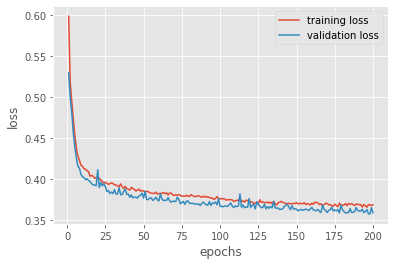

In [57]:
train_loss=model_history.history["loss"]
val_loss=model_history.history["val_loss"]
epochs=range(1,201)
plt.plot(epochs,train_loss,label="training loss")
plt.plot(epochs,val_loss,label="validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

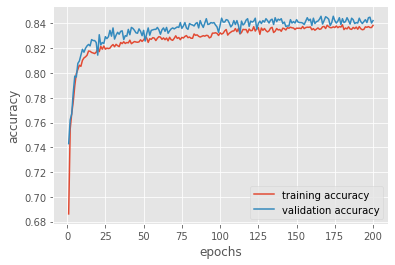

In [58]:
train_acc=model_history.history["accuracy"]
val_acc=model_history.history["val_accuracy"]
epochs=range(1,201)
plt.plot(epochs,train_acc,label="training accuracy")
plt.plot(epochs,val_acc,label="validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

### 4.Making the prediction and evaluating the model

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay

In [60]:
model.predict(scaler.transform([[600,1,40,3,60000,2,1,1,50000,1,0]]))

1/1 [==============================] - 0s 95ms/step


array([[0.00183822]], dtype=float32)

#### Predicting the test set results

In [61]:
y_test_pred=model.predict(X_test)

100/100 [==============================] - 0s 1ms/step


In [62]:
y_test_pred=pd.DataFrame(y_test_pred)

In [63]:
y_test_pred=round(y_test_pred)

In [64]:
y_test=y_test.reset_index()

In [65]:
y_test.drop("index",axis=1,inplace=True)

In [66]:
prediction=pd.concat([y_test_pred,y_test],axis=1)

In [67]:
prediction.columns=["predicted","actual"]

In [68]:
prediction.head()

,predicted,actual
0,0.0,0
1,0.0,0
2,1.0,1
3,1.0,0
4,1.0,1


In [69]:
accuracy_score(y_test,y_test_pred)

0.8151286880100439

In [70]:
cf=confusion_matrix(y_test,y_test_pred)

In [71]:
cf

array([[1352,  241],
       [ 348, 1245]], dtype=int64)

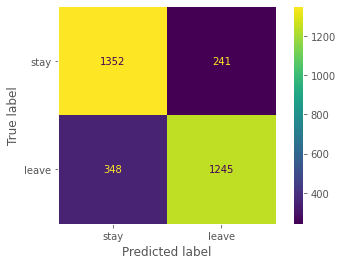

In [72]:
cmd=ConfusionMatrixDisplay(cf,display_labels=["stay","leave"])
cmd.plot()
plt.grid(False)

#### Precision and recall and F1 score

In [73]:
TP=cf[1][1]
predicted_leave=cf[1][1] + cf[0][1]
precision_for_leave=TP/predicted_leave

In [74]:
precision_for_leave

0.8378196500672948

In [75]:
TN=cf[0][0]
predicted_stay=cf[0][0] + cf[1][0]
precision_for_stay=TN/predicted_stay

In [76]:
precision_for_stay

0.7952941176470588

In [77]:
actual_leave=sum(cf[1][:])
recall_for_leave=TP/actual_leave
recall_for_leave

0.7815442561205274

In [78]:
actual_stay=sum(cf[0][:])
recall_for_stay=TN/actual_stay
recall_for_stay

0.8487131198995606

In [79]:
F1_score_for_leave=(2*precision_for_leave*recall_for_leave)/(precision_for_leave + recall_for_leave)
F1_score_for_leave

0.8087041247158169

In [80]:
F1_score_for_stay=(2*precision_for_stay*recall_for_stay)/(precision_for_stay + recall_for_stay)
F1_score_for_stay

0.8211357424840571

In [81]:
d={"parameter":["precision","recall","F1 score"],"stay":[precision_for_stay,recall_for_stay,F1_score_for_stay]
 ,"leave":[precision_for_leave,recall_for_leave,F1_score_for_leave]}

In [82]:
classification_report=pd.DataFrame(d)

In [83]:
classification_report

,parameter,stay,leave
0,precision,0.795294,0.837820
1,recall,0.848713,0.781544
2,F1 score,0.821136,0.808704


In [84]:
model.save("my_model.h5")

In [85]:
from tensorflow.keras.models import load_model

In [86]:
model1=load_model("my_model.h5")

In [87]:
model1.predict(scaler.transform([[600,1,40,3,60000,2,1,1,50000,1,0]]))

1/1 [==============================] - 0s 68ms/step


array([[0.00183822]], dtype=float32)

In [88]:
model1.predict(scaler.transform([[530,0,44,2,0,1,0,0,8079,1,0]]))

1/1 [==============================] - 0s 21ms/step


array([[0.9462429]], dtype=float32)